Dataset: wiki_machine_learning.csv

Description: Data represents how many times Wikipedia page of Machine Learning was read during
some period of time. The data is presented in csv format as follows: date, count, lang, page, rank,
month, title. Null values of count column are identified with 0, please remove them while
preprocessing.

Task: You are asked to create a model using Facebook Prophet and Neural Prophet algorithms to
predict how many times the article will read for the future 30 days (count column).

In [48]:
import warnings
import itertools

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime
import random as rd
import statsmodels.api as sm
!pip install prophet
from prophet import Prophet
# import prophet

import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.4-py3-none-any.whl (73 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [16]:
data=pd.read_csv("POP.csv", parse_dates=["date"])

In [17]:
data

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [18]:
data.columns

Index(['realtime_start', 'value', 'date', 'realtime_end'], dtype='object')

In [19]:
for c in data.columns[1:]:
  print (c)
  print(data[c].unique(),'\n')

value
[156309.    156527.    156731.    156943.    157140.    157343.
 157553.    157798.    158053.    158306.    158451.    158757.
 158973.    159170.    159349.    159556.    159745.    159956.
 160184.    160449.    160718.    160978.    161223.    161453.
 161690.    161912.    162124.    162350.    162564.    162790.
 163026.    163290.    163570.    163847.    164107.    164349.
 164588.    164809.    165018.    165251.    165463.    165695.
 165931.    166192.    166473.    166755.    167023.    167270.
 167513.    167746.    167977.    168221.    168436.    168659.
 168903.    169191.    169488.    169780.    170063.    170315.
 170571.    170806.    171029.    171271.    171501.    171741.
 171984.    172257.    172538.    172816.    173070.    173298.
 173533.    173746.    173945.    174176.    174397.    174639.
 174882.    175143.    175413.    175697.    175966.    176207.
 176447.    176685.    176905.    177146.    177365.    177591.
 177830.    178101.    178376.    

In [20]:
data.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [21]:
df=data.copy()

In [36]:
df.tail()

,realtime_start,value,date,realtime_end
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06
815,2019-12-06,330309.946,2019-12-01,2019-12-06


In [23]:
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  816 non-null    object        
 1   value           816 non-null    float64       
 2   date            816 non-null    datetime64[ns]
 3   realtime_end    816 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 25.6+ KB


In [32]:
df.duplicated().any()

False

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_A = seasonal_decompose(df['value'].values,freq=30, model='additive')
result_M = seasonal_decompose(df['value'].values,freq=30, model = 'multiplicative')

(<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>)

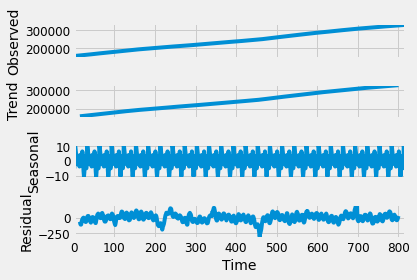

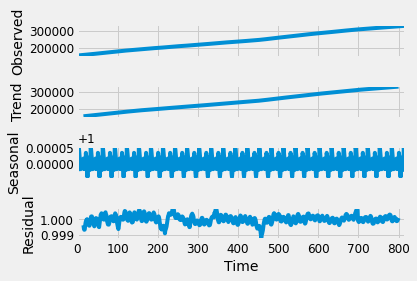

In [30]:
result_A.plot(),result_M.plot()

In [34]:
def st_check(timeseries):
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  
st_check(df['value'])

Test statistic                  -0.665317
p-value                          0.855530
#Lags Used                      17.000000
Number of Observations Used    798.000000
Critical Value (1%)             -3.438571
Critical Value (5%)             -2.865169
Critical Value (10%)            -2.568702
dtype: float64


In [35]:
print("\n" ,"start date:",df.date.min(), "\n",
      "end_date:" , df.date.max(),"\n",
      "days in range:", (df.date.max()-df.date.min()).days) 


 start date: 1952-01-01 00:00:00 
 end_date: 2019-12-01 00:00:00 
 days in range: 24806


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  816 non-null    object        
 1   value           816 non-null    float64       
 2   date            816 non-null    datetime64[ns]
 3   realtime_end    816 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 25.6+ KB


# Facebook Prophet

In [41]:
proph=df[['date', 'value']].rename(columns={'date': "ds", "value": "y"})

In [42]:
proph.head()

,ds,y
0,1952-01-01,156309.0
1,1952-02-01,156527.0
2,1952-03-01,156731.0
3,1952-04-01,156943.0
4,1952-05-01,157140.0


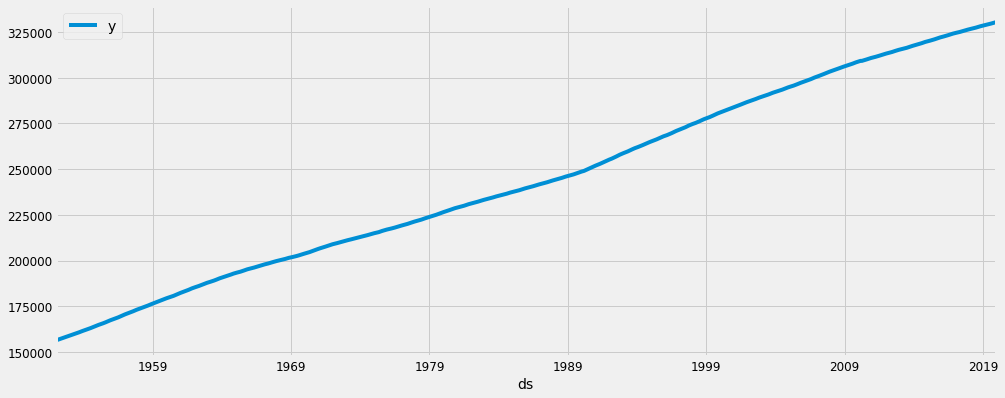

In [43]:
proph.plot(figsize=(15, 6), y='y', x='ds')
plt.show()

In [51]:
proph.corr()

,y
y,1.0


In [49]:
model=Prophet(interval_width=0.95)
model.fit(proph)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwj9z81r/yg19bojk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwj9z81r/9x3ukuhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55457', 'data', 'file=/tmp/tmpnwj9z81r/yg19bojk.json', 'init=/tmp/tmpnwj9z81r/9x3ukuhe.json', 'output', 'file=/tmp/tmpu1jxpvmk/prophet_model-20220801075605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [84]:
data_future=model.make_future_dataframe(periods=500)
data_forecast=model.predict(data_future)

In [85]:
data_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1311,2021-04-10,334515.451404,333861.855141,335193.447553
1312,2021-04-11,334534.853052,333870.727123,335230.796495
1313,2021-04-12,334548.275470,333822.945509,335291.425847
1314,2021-04-13,334555.666863,333855.683273,335280.395349
1315,2021-04-14,334557.156676,333914.462686,335226.291281


Text(0.5, 1.0, 'POP')

<Figure size 1152x576 with 0 Axes>

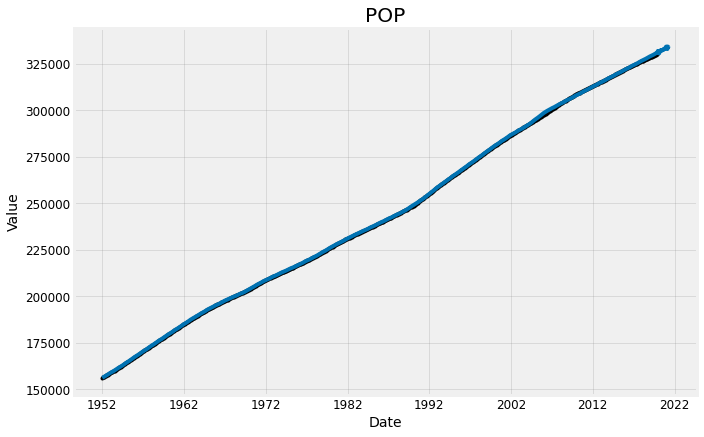

In [87]:
plt.figure(figsize = (16,8))
model.plot(data_forecast, xlabel = 'Date', ylabel = 'Value')
plt.title('POP')

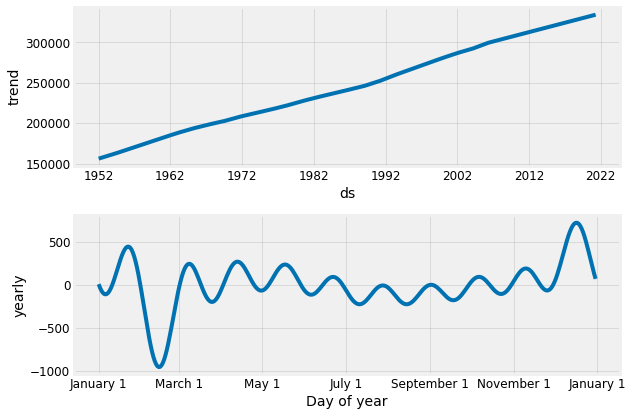

In [88]:
fig = model.plot_components(data_forecast)

# Neural Prophet

In [64]:
# !pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 1.9 MB/s 


In [66]:
from neuralprophet import NeuralProphet

In [76]:
proph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      816 non-null    datetime64[ns]
 1   y       816 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [94]:
test_length = 400
df_train = proph

In [95]:
np_model = NeuralProphet()
metrics = np_model.fit(df_train, freq="M")
np_future_df = np_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
np_preds_df = np_model.predict(np_future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.544% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 91.544% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=Tr

  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.03E-02, min: 5.39E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.03E-02, min: 5.39E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.03E-02, min: 1.40E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.03E-02, min: 1.40E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.14E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 7.14E-02
Epoch[207/207]: 100%|██████████| 207/207 [00:26<00:00,  7.89it/s, SmoothL1Loss=1.35e-6, MAE=234, RMSE=273, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.544% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 91.544% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.53% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 91.53% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

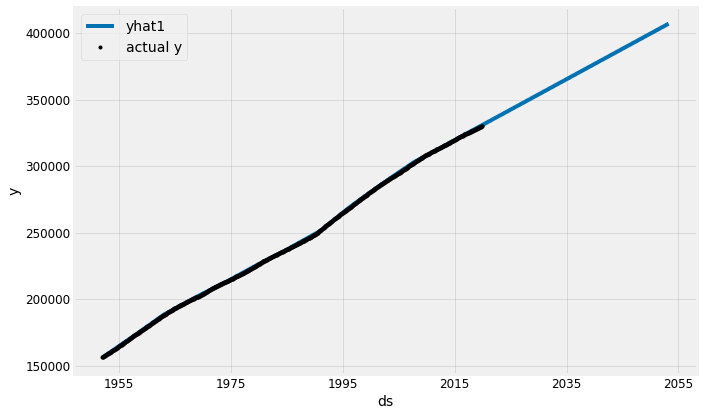

In [96]:
np_model.plot(np_preds_df)
plt.show()

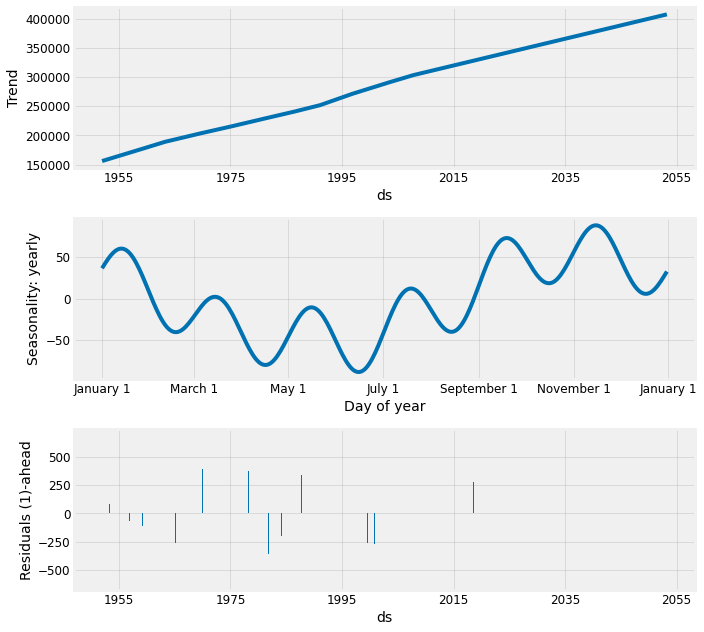

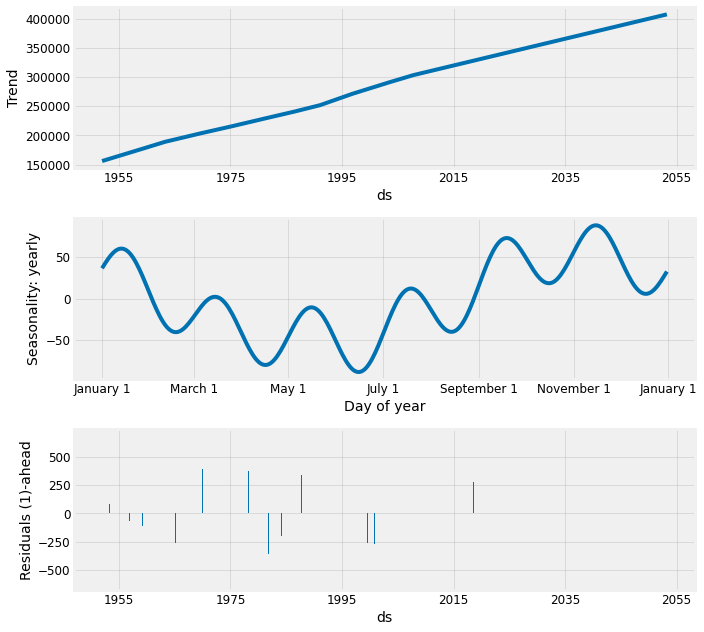

In [97]:
np_model.plot_components(np_preds_df, residuals=True)

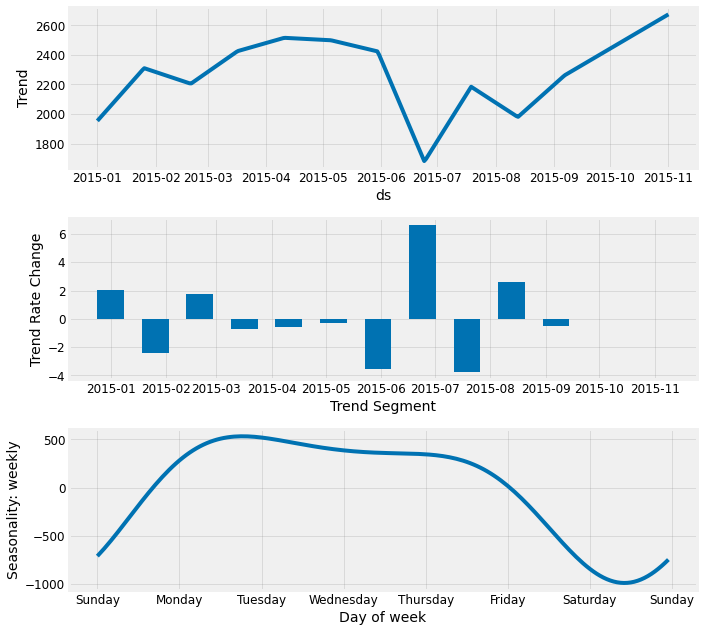

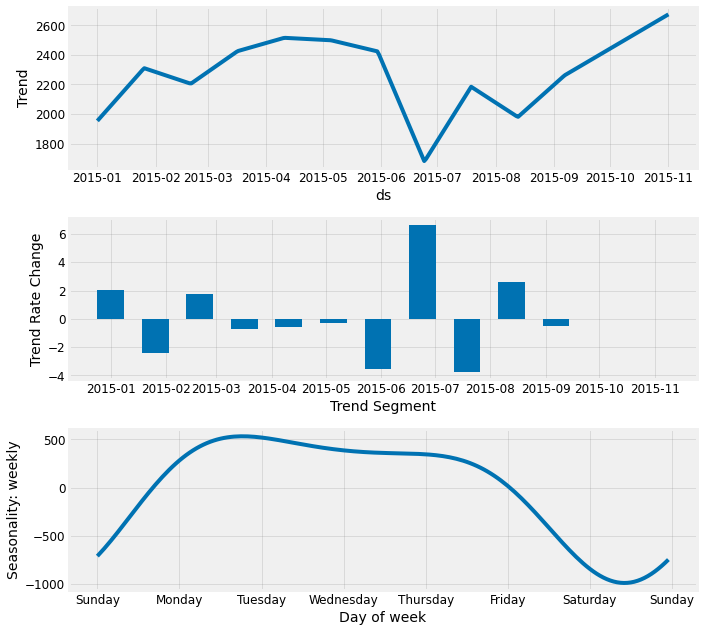

In [ ]:
np_model.plot_parameters()

In [99]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [101]:
data_future_np=np_model.make_future_dataframe(df_train,periods=250)
data_forecast_np=np_model.predict(data_future_np)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.544% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 91.544% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 91.2% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 91.2% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 91.2% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 91.2% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M


In [105]:
data_forecast_np.tail()

,ds,y,yhat1,residual1,trend,season_yearly
245,2040-05-31,None,377818.71875,NaN,377868.0625,-49.322327
246,2040-06-30,None,378009.62500,NaN,378056.0625,-46.453934
247,2040-07-31,None,378239.18750,NaN,378250.3750,-11.174616
248,2040-08-31,None,378457.56250,NaN,378444.6250,12.931773
249,2040-09-30,None,378684.59375,NaN,378632.6875,51.917500


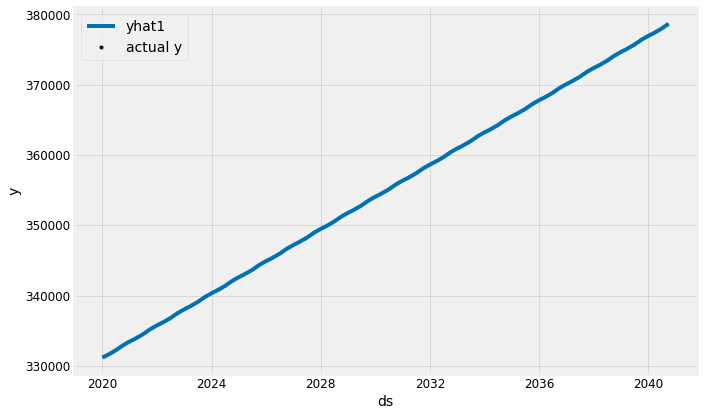

In [104]:
fig3=np_model.plot(data_forecast_np)
plt.show()